In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

import Anomaly_Analysis_helper as aa

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mid_cap_all_sectors_ret.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
# test_data.to_csv('test_set.csv', index=True)

In [4]:
anomalies_lstm = pd.read_csv('Anomaly_Dataset/lstm.csv', index_col='date', parse_dates=True)
anomalies_cnn = pd.read_csv('Anomaly_Dataset/cnn.csv', index_col='date', parse_dates=True)
anomalies_isoforest = pd.read_csv('Anomaly_Dataset/isolation_forest.csv', index_col='date', parse_dates=True)
anomalies_knn = pd.read_csv('Anomaly_Dataset/KNN.csv', index_col='date', parse_dates=True)
anomalies_statistical = pd.read_csv('Anomaly_Dataset/statistics.csv', index_col='date', parse_dates=True)
anomalies_mahalanobis = pd.read_csv('Anomaly_Dataset/mahalanobis_distance.csv', index_col='date', parse_dates=True)

In [5]:
dates_match = (
    anomalies_lstm.index.equals(anomalies_cnn.index) and
    anomalies_lstm.index.equals(anomalies_knn.index) and
    anomalies_lstm.index.equals(anomalies_isoforest.index) and
    anomalies_lstm.index.equals(anomalies_statistical.index) and
    anomalies_lstm.index.equals(anomalies_mahalanobis.index)
)
print(f"Do all datasets have matching dates? {dates_match}")

columns_match = (
    anomalies_lstm.columns.equals(anomalies_cnn.columns) and
    anomalies_lstm.columns.equals(anomalies_knn.columns) and
    anomalies_lstm.columns.equals(anomalies_isoforest.columns) and
    anomalies_lstm.columns.equals(anomalies_statistical.columns) and
    anomalies_lstm.columns.equals(anomalies_mahalanobis.columns)
)
print(f"Do all datasets have matching sectors? {columns_match}")

Do all datasets have matching dates? True
Do all datasets have matching sectors? True


In [6]:
# combining dataset
anomalies_dict = {
    'LSTM': anomalies_lstm,
    'CNN': anomalies_cnn,
    'KNN': anomalies_knn,
    'IsolationForest': anomalies_isoforest,
    'Statistical': anomalies_statistical,
    'Mahalanobis': anomalies_mahalanobis
}

anomalies_combined = pd.concat(anomalies_dict, axis=1)

Anomalies Count per Sector and Model: 
                        LSTM  CNN  KNN  IsolationForest  Statistical  \
Materials                 76   20   86               39           27   
Industrials              107   56  100               47           57   
Health Care               93   59   33               17           50   
Real Estate               37   42   87               52           53   
Consumer Discretionary   103  163   57               59          174   
Financials                51   74  118               75           76   
Utilities                 97   74   82               68           70   
Information Technology   116   70   73               14           64   
Energy                    89   56   29               83           54   
Consumer Staples          36   70   10               17           61   
Communication Services    68   71   42               10           67   

                        Mahalanobis  
Materials                        17  
Industrials         

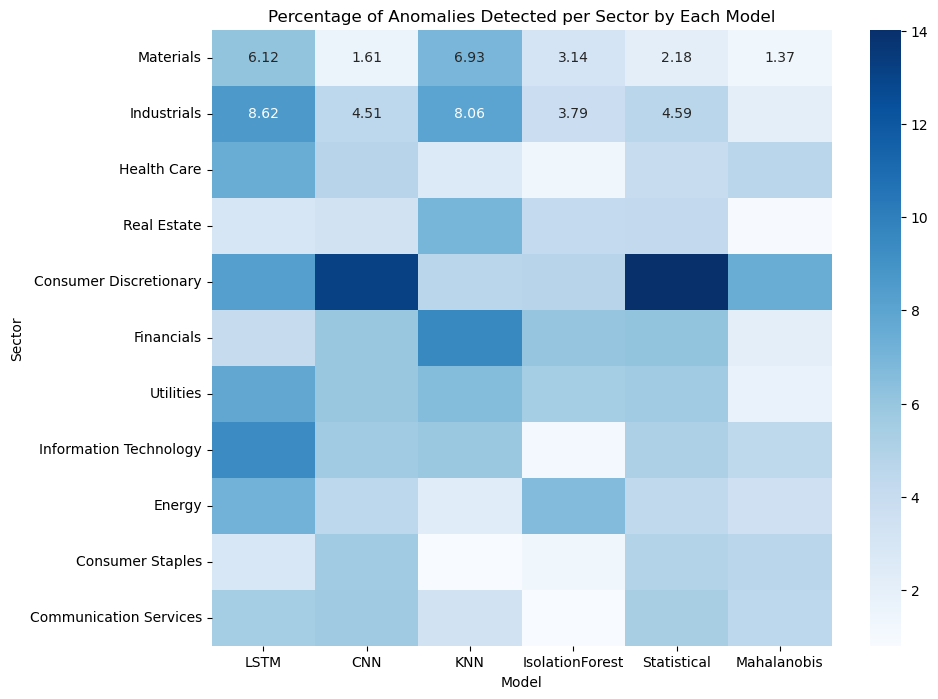

In [7]:
anomaly_counts, anomaly_percentage = aa.summarize_anomalies(anomalies_dict, print_info=True, plot=True)

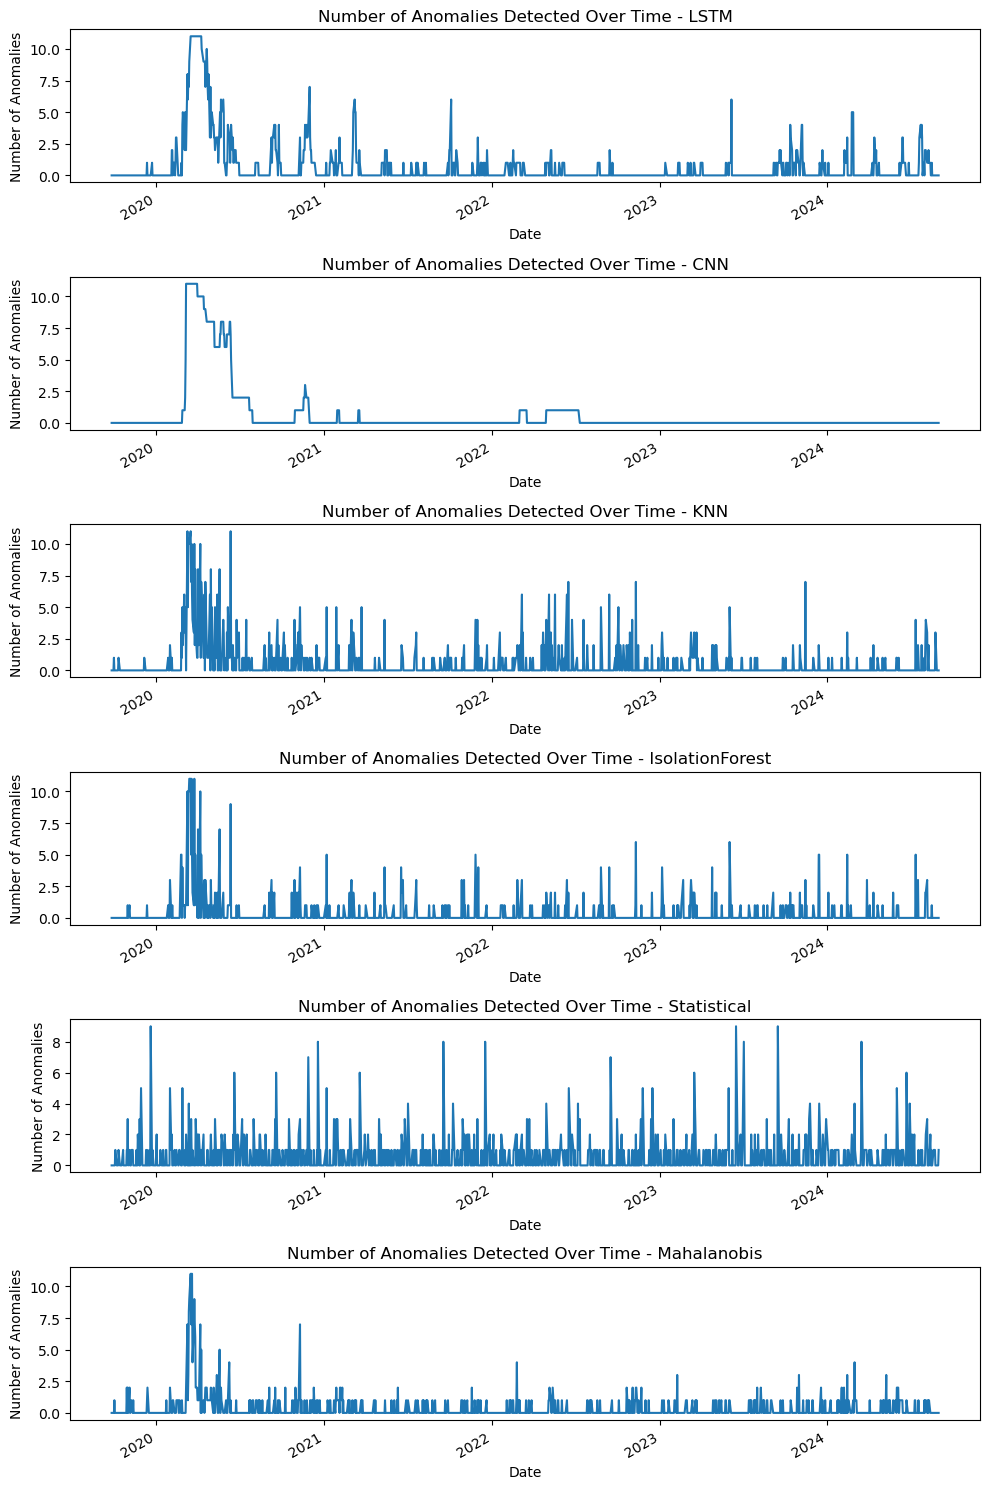

In [8]:
aa.plot_anomaly_distribution(anomalies_dict)

Jaccard Similarity Index Between Models:


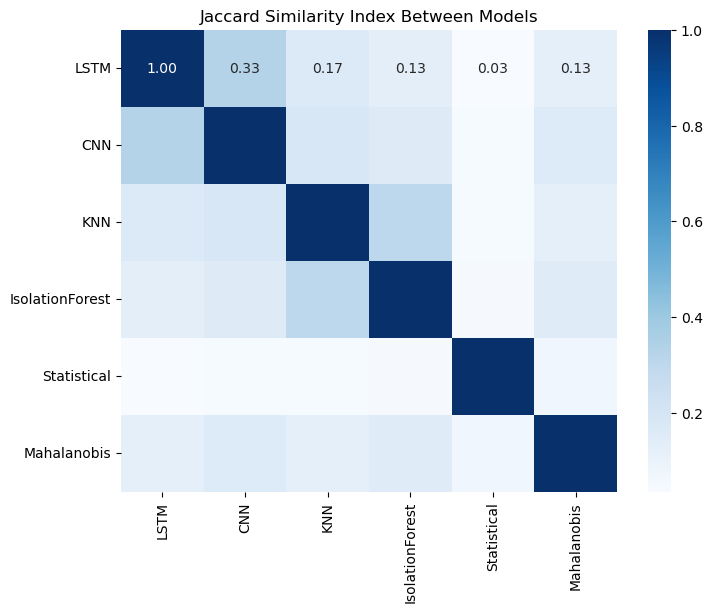

In [9]:
aa.get_jaccard(anomalies_dict)

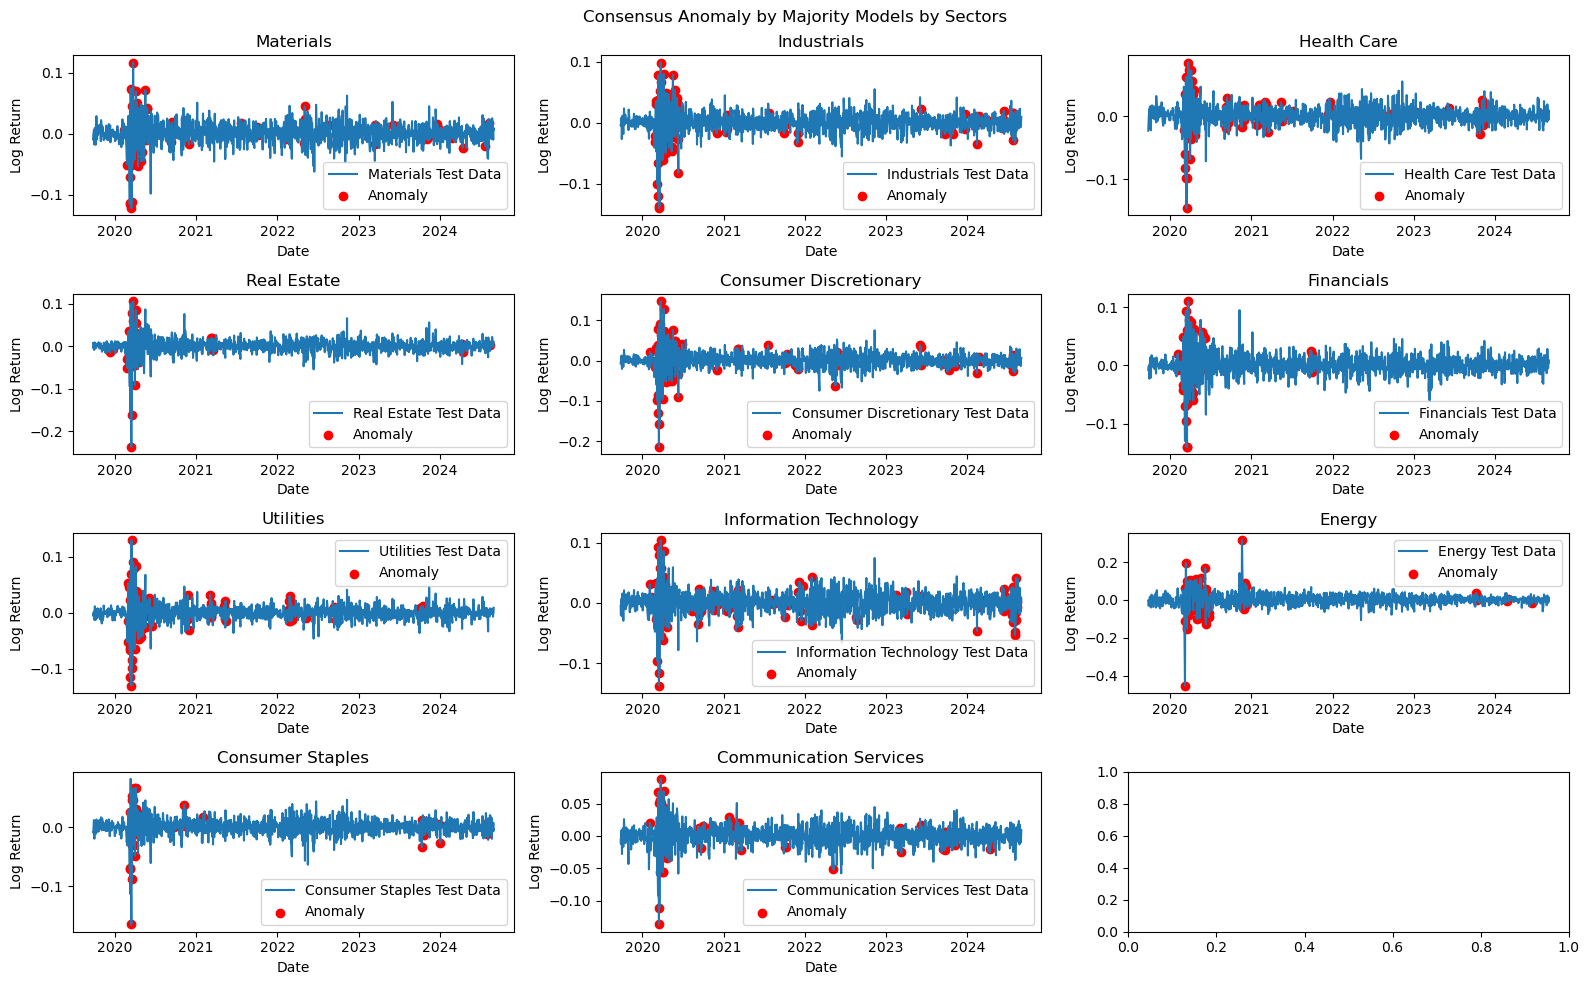

In [10]:
aa.plot_anomalies(anomalies_dict,'LSTM')

Getting Consensus Anomalies for Models:  ['LSTM', 'CNN', 'KNN', 'IsolationForest']


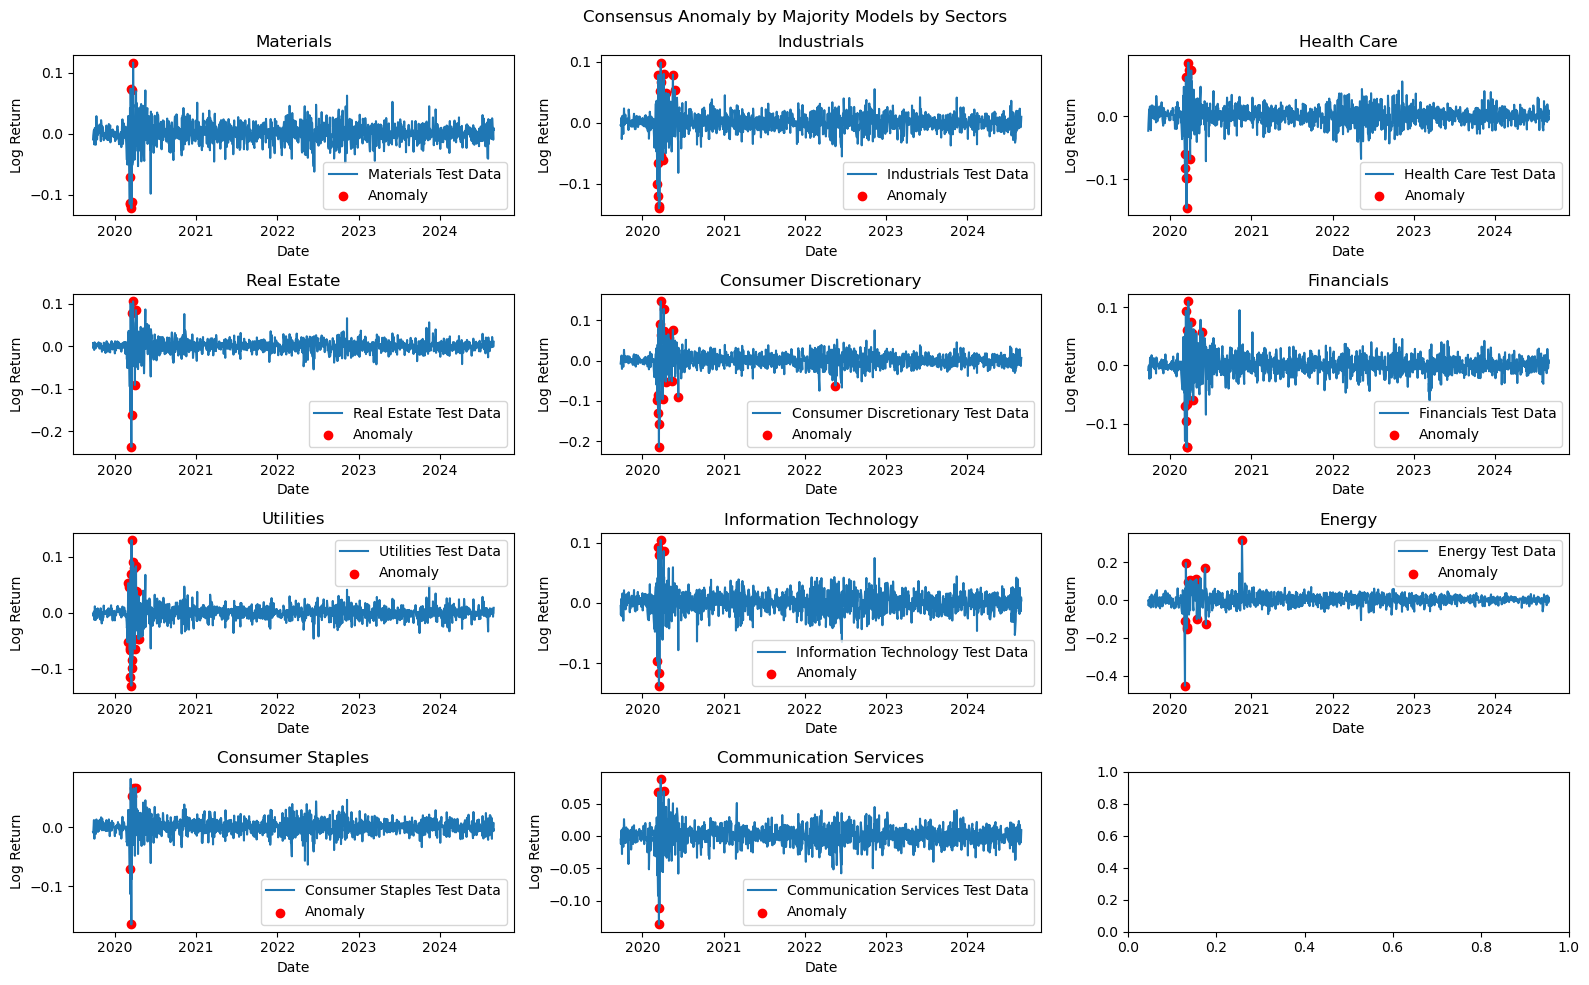

In [11]:
model_list = ['LSTM', 'CNN', 'KNN', 'IsolationForest']
sector_anomaly_consensus = aa.anomalies_consensus(anomalies_dict, model_list, plot=True)

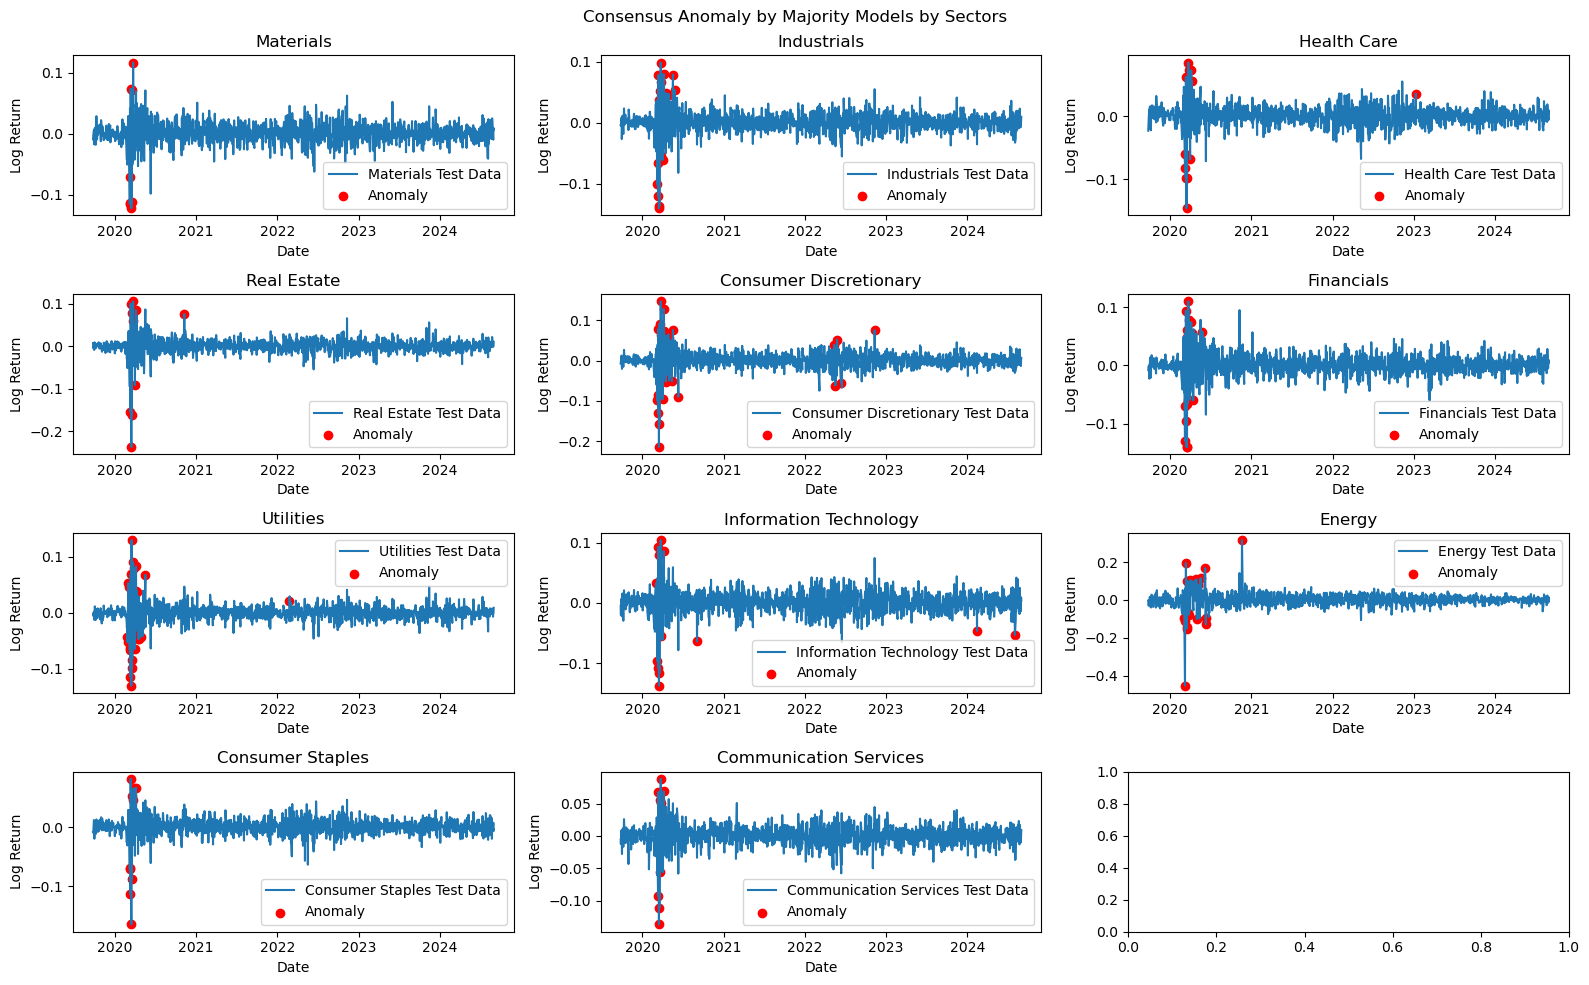

In [12]:
majority_anomaly_consensus = aa.majority_anomalies_consensus(anomalies_dict, consensus_threshold = 4, plot = True)

In [14]:
consensus_anomaly_dates = aa.anomaly_dates(majority_anomaly_consensus)